In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl 
import os
import glob
import math
from scipy.special import comb

## agg backend is used to create plot as a .png file
mpl.use('agg')

In [2]:
def beautifully_subplot_data(data, title, subtitle, save, tcks=False, ylm=False, RL=False):
    fig = plt.figure()
    if tcks: fig.set_figheight(5)
    else: fig.set_figheight(4)
    if tcks: fig.set_figwidth(8)
    else: fig.set_figwidth(15)
    st = fig.suptitle(title, fontsize="x-large")
    j = 0;
    for dataitem in data:
        y_pos = np.arange(len(dataitem[0]))
        j += 1
        ax1 = plt.subplot(1, 2, j)
        plt.subplots_adjust(wspace=0.30, hspace=0.20)
        if RL:
            plt.plot(y_pos, dataitem[0], 'ko-', label='Basic Q-Learning')
            plt.plot(y_pos, dataitem[1], 'ro--', label='RL Two Split')
            plt.plot(y_pos, dataitem[2], 'bo:', label='RL Three Split')
            plt.plot(y_pos, dataitem[3], 'go-.', label='RL Four Split') 
        else:
            plt.plot(y_pos, dataitem[0], 'ko-', label='Human Avg')
            plt.plot(y_pos, dataitem[1], 'ro--', label='Reinforcement Learning')
            plt.plot(y_pos, dataitem[2], 'bo:', label='Decision Tree')
            plt.plot(y_pos, dataitem[3], 'go-.', label='Random Forest')
        if tcks: plt.legend(loc='upper right')
        else: plt.legend(loc='upper left')
        if ylm: plt.ylim([0,1])
#         else: plt.ylim([0,12])
        plt.title(subtitle+" (250)" if j==0 else subtitle+" (500)")
        if tcks: plt.xticks(np.arange(5), ('3', '6', '9', '12', '15'))
        plt.xlabel("Position")
        plt.ylabel(subtitle)
#         plt.ylim([0, 1 if j == 1 or j == 3 else np.ceil(np.max(num)) + 5])     
    
    plt.show()
    fig.tight_layout()

    # shift subplots down:
    st.set_y(0.96)
    fig.subplots_adjust(top=0.90)
    # Save the figure
    fig.savefig("Results/Comparision/"+save+".png" , bbox_inches='tight')

In [3]:
def selecting_data_comb(filenames):
    select_250 = np.zeros(15)
    select_500 = np.zeros(15)
    plot_data = []
    for file_name in filenames:
        fileObject = open(file_name,'rb')  
        all_selected = pickle.load(fileObject)
        fileObject.close()

        selecting = []
        for i in range (len(all_selected)):
            temp_select = np.zeros(15)

            for j in range (len(all_selected[i])):
                temp_select[all_selected[i][j][1]] += 1

            if i == 0: select_250 = np.add(select_250, temp_select)
            else: select_500 = np.add(select_500, temp_select)
    
    select_250 = select_250/len(filenames)
    select_500 = select_500/len(filenames)
    
    return select_250, select_500

In [4]:
def super_duper_selecting_plotter():
    filenames_human = ["Tests/test_1", "Tests/test_2", "Tests/test_3", "Tests/test_4", "Tests/test_5", 
                       "Tests/test_6", "Tests/test_7", "Tests/test_8", "Tests/test_9", "Tests/test_10"]
    filenames_DT = ["Tests/decision_tree"]
    filenames_RF = ["Tests/random_forest"]
    filenames_RL1 = ["Tests/basic_RL"]
    filenames_RL2 = ["Tests/rl_two_split_10_5"]
    filenames_RL3 = ["Tests/rl_three_split_avg"]
    filenames_RL4 = ["Tests/rl_four_split_avg"]

    H_S_250, H_S_500 = selecting_data_comb(filenames_human)
    D_S_250, D_S_500 = selecting_data_comb(filenames_DT)
    Rf_S_250, Rf_S_500 = selecting_data_comb(filenames_RF)
    Rl1_S_250, Rl1_S_500 = selecting_data_comb(filenames_RL1)
    Rl2_S_250, Rl2_S_500 = selecting_data_comb(filenames_RL2)
    Rl3_S_250, Rl3_S_500 = selecting_data_comb(filenames_RL3)
    Rl4_S_250, Rl4_S_500 = selecting_data_comb(filenames_RL4)
    
    data = []
    data_RL = []
    data.extend([[H_S_250, Rl3_S_250, D_S_250, Rf_S_250],[H_S_500, Rl3_S_500, D_S_500, Rf_S_500]])
    data_RL.extend([[Rl1_S_250, Rl2_S_250, Rl3_S_250, Rl4_S_250],[Rl1_S_500, Rl2_S_500, Rl3_S_500, Rl4_S_500]])
    
    beautifully_subplot_data(data, "Position Bought Comparision", "Position Bought", "Position_Bought")
    beautifully_subplot_data(data_RL, "Position Bought Comparision (Reinforcement Learning)", "Position Bought", "Position_Bought", RL=True)

In [5]:
def plot(plot_data, filename):
    fig = plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(5)
    st = fig.suptitle(filename[14:-4], fontsize="x-large")
    j = 0;
    for num in plot_data:
        y_pos = np.arange(len(num))
        j += 1
        plt.subplot(2, 2, j)
        plt.subplots_adjust(wspace=0.30, hspace=0.20)
        if j==1 or j==3:
            plt.plot(y_pos, num, 'ro:')
            plt.title("Prob Choice (250)" if j==1 else "Prob Choice (500)")
            plt.ylim([0, 1 if j == 1 or j == 3 else np.ceil(np.max(num)) + 5])     
            plt.xticks(np.arange(5), ('3', '6', '9', '12', '15'))
        else:
            bp = plt.boxplot(num, showfliers=False, patch_artist=True)
            plt.title("Avg Error (250)" if j==2 else "Avg Error (500)")
            plt.xticks(np.arange(6), ('0', '3', '6', '9', '12', '15'))
            
            for box in bp['boxes']:
                # change outline color
                box.set( color='#7570b3', linewidth=2)
                # change fill color
                box.set(facecolor = '#1b9e77')

            ## change color and linewidth of the whiskers
            for whisker in bp['whiskers']:
                whisker.set(color='#7570b3', linewidth=2)

            ## change color and linewidth of the caps
            for cap in bp['caps']:
                cap.set(color='#7570b3', linewidth=2)

            ## change color and linewidth of the medians
            for median in bp['medians']:
                median.set(color='#b2df8a', linewidth=2)

            ## change the style of fliers and their fill
            for flier in bp['fliers']:
                flier.set(marker='o', color='#e7298a', alpha=0.5)
        #plt.xlim([-1,15])
        plt.xlabel('Position')
        plt.grid(which='minor')
        plt.ylabel('Probability' if j == 1 or j == 3 else 'Error')
    
    fig.tight_layout()

    # shift subplots down:
    st.set_y(0.96)
    fig.subplots_adjust(top=0.90)
    # Save the figure
    fig.savefig(filename , bbox_inches='tight')

In [6]:
def plot_data_comb(filenames,sloc,title):
    fileObject = open("Tests/Human_minimum.pickle",'rb')  
    minima = pickle.load(fileObject)
    fileObject.close()

    figure = ".png"
    data_correct =[]

    for i in range (len(minima)):
        temp_data_correct = np.zeros(15)
        for j in range (len(minima[i])):
            temp_data_correct[minima[i][j][1]] += 1

        data_correct.append(temp_data_correct)

    selected_sum_250 = np.zeros(5)
    selected_sum_500 = np.zeros(5)
    selected_error_250 = [np.zeros(8) for i in range(5)]
    selected_error_500 = [np.zeros(8) for i in range(5)]

    indices = [2, 5, 8, 11, 14]
    plot_data = []

    for file_name in filenames:
        fileObject = open(file_name,'rb')  
        all_selected = pickle.load(fileObject)
        fileObject.close()

        add = []
        error_sum = []
        for i in range (len(all_selected)):
            temp_correct = np.zeros(15)
            temp_error_sum = 0
            temp_error = [[] for i in range(15)]

            for j in range (len(all_selected[i])):
                if all_selected[i][j] == minima[i][j]:
                    temp_correct[minima[i][j][1]] += 1

                temp_error[minima[i][j][1]].append(np.abs(all_selected[i][j][0] - minima[i][j][0]))
                temp_error_sum += np.abs(all_selected[i][j][0] - minima[i][j][0])

            add.append(np.sum(temp_correct))
            error_sum.append(temp_error_sum)
            temp_correct = np.true_divide(temp_correct, data_correct)        
            
            if i == 0: selected_sum_250 = np.add(selected_sum_250, np.take(temp_correct, indices))
            else: selected_sum_500 = np.add(selected_sum_500, np.take(temp_correct, indices))
                
            if i == 0: selected_error_250 = [np.add(selected_error_250[i], np.take(temp_error, indices)[i]) for i in range(5)]
            else: selected_error_500 = [np.add(selected_error_250[i], np.take(temp_error, indices)[i]) for i in range(5)]

        print(file_name[6:], '\t\t', add, error_sum)
    
    selected_sum_250 = selected_sum_250/len(filenames)
    selected_sum_500 = selected_sum_500/len(filenames)
    selected_error_250 = [selected_error_250[i]/len(filenames) for i in range(5)]
    selected_error_500 = [selected_error_500[i]/len(filenames) for i in range(5)]
    
    plot_data.extend([selected_sum_250, selected_error_250, selected_sum_500, selected_error_500])
    plot(plot_data, "Results/"+sloc+"/"+title+figure)
    return selected_sum_250, selected_sum_500, selected_error_250, selected_error_500

In [7]:
def beautifully_plot_data():
    filenames_human = ["Tests/test_1", "Tests/test_2", "Tests/test_3", "Tests/test_4", "Tests/test_5", 
                       "Tests/test_6", "Tests/test_7", "Tests/test_8", "Tests/test_9", "Tests/test_10"]
    filenames_DT = ["Tests/decision_tree"]
    filenames_RF = ["Tests/random_forest"]
    filenames_RL1 = ["Tests/basic_RL"]
    filenames_RL2 = ["Tests/rl_two_split_10_5"]
    filenames_RL3 = ["Tests/rl_three_split_avg"]
    filenames_RL4 = ["Tests/rl_four_split_avg"]

    H_P_250, H_P_500, H_E_250, H_E_500 = plot_data_comb(filenames_human,"Human","Human Average")
    D_P_250, D_P_500, D_E_250, D_E_500 = plot_data_comb(filenames_DT,"Algos", "Decision Tree")
    Rf_P_250, Rf_P_500, Rf_E_250, Rf_E_500 = plot_data_comb(filenames_RF,"Algos", "Random Forest")
    Rl1_P_250, Rl1_P_500, Rl1_E_250, Rl1_E_500 = plot_data_comb(filenames_RL1,"Algos", "Basic RL")
    Rl2_P_250, Rl2_P_500, Rl2_E_250, Rl2_E_500 = plot_data_comb(filenames_RL2,"Algos", "RL Two Split")
    Rl3_P_250, Rl3_P_500, Rl3_E_250, Rl3_E_500 = plot_data_comb(filenames_RL3,"Algos", "RL Three Split")
    Rl4_P_250, Rl4_P_500, Rl4_E_250, Rl4_E_500 = plot_data_comb(filenames_RL4,"Algos", "RL Four Split")
    
    data = []
    data_RL = []
    data.extend([[H_P_250, Rl3_P_250, D_P_250, Rf_P_250],[H_P_500, Rl3_P_500, D_P_500, Rf_P_500]])
    data_RL.extend([[Rl1_P_250, Rl2_P_250, Rl3_P_250, Rl4_P_250],[Rl1_P_500, Rl2_P_500, Rl3_P_500, Rl4_P_500]])
    beautifully_subplot_data(data, "Probability Correct Comparision", "Probability Correct", "Prob_Correct", tcks=True, ylm=True)
    beautifully_subplot_data(data_RL, "Probability Correct Comparision (Reinforcement Learning)", "Probability Correct", "Prob_Correct", tcks=True, ylm=True, RL=True)

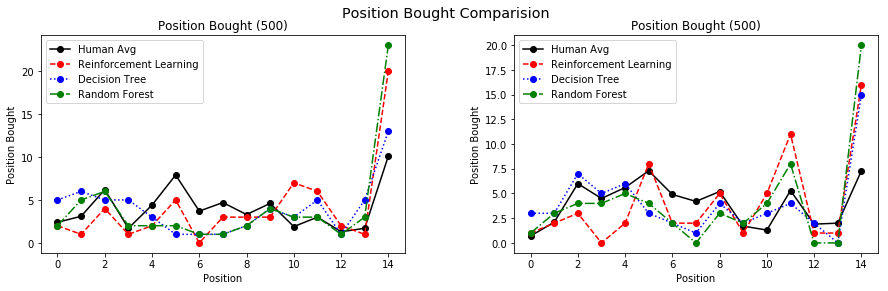

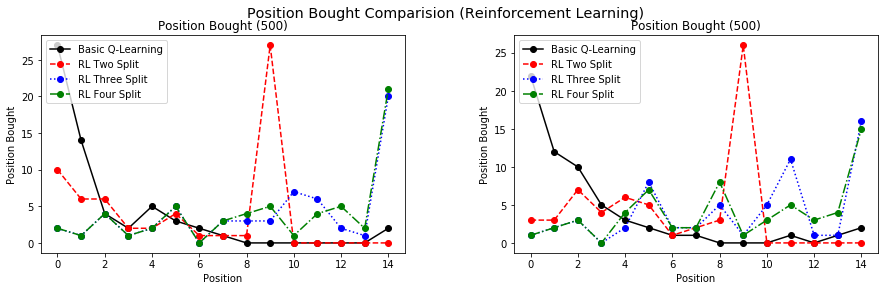

test_1 		 [20.0, 20.0] [775.0, 1765.0]
test_2 		 [18.0, 29.0] [979.0, 1134.0]
test_3 		 [18.0, 20.0] [1022.0, 1665.0]
test_4 		 [18.0, 32.0] [947.0, 1034.0]
test_5 		 [15.0, 24.0] [1043.0, 1026.0]
test_6 		 [15.0, 17.0] [1351.0, 1907.0]
test_7 		 [15.0, 29.0] [1109.0, 1383.0]
test_8 		 [25.0, 28.0] [910.0, 1494.0]
test_9 		 [25.0, 26.0] [1026.0, 1352.0]
test_10 		 [15.0, 29.0] [1277.0, 1154.0]
decision_tree 		 [13.0, 24.0] [1404.0, 1642.0]
random_forest 		 [20.0, 24.0] [1121.0, 1908.0]
basic_RL 		 [8.0, 17.0] [1492.0, 2397.0]
rl_two_split_10_5 		 [12.0, 18.0] [1384.0, 2527.0]
rl_three_split_avg 		 [25.0, 34.0] [883.0, 1160.0]
rl_four_split_avg 		 [28.0, 31.0] [871.0, 1271.0]


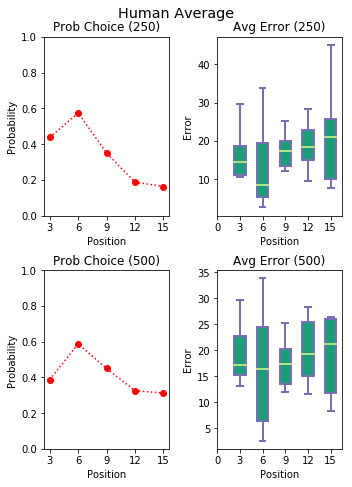

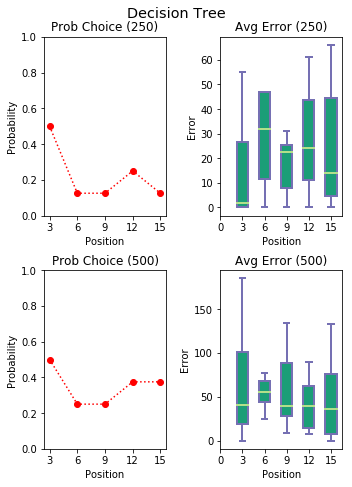

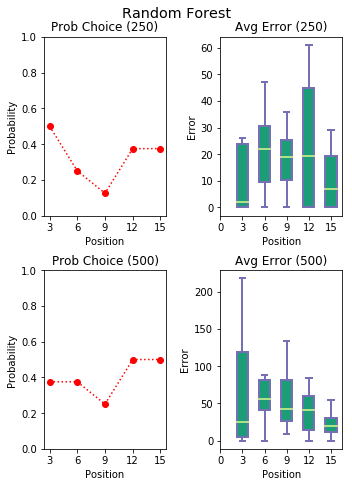

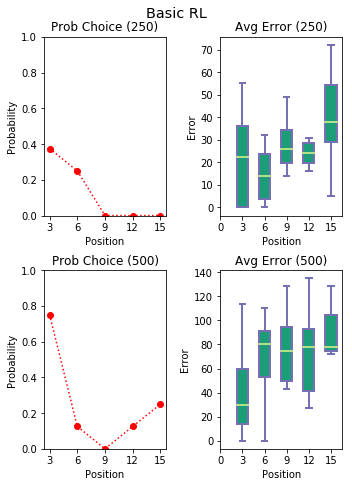

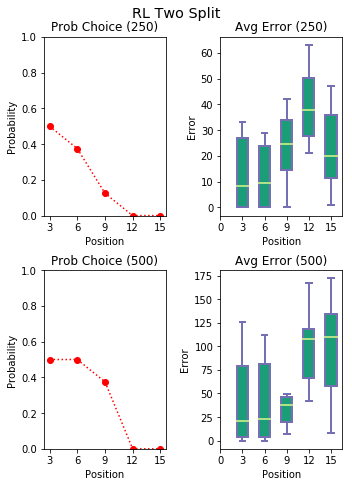

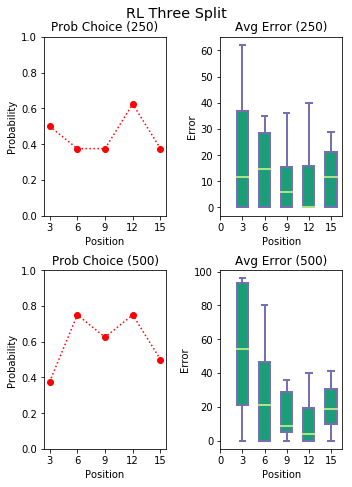

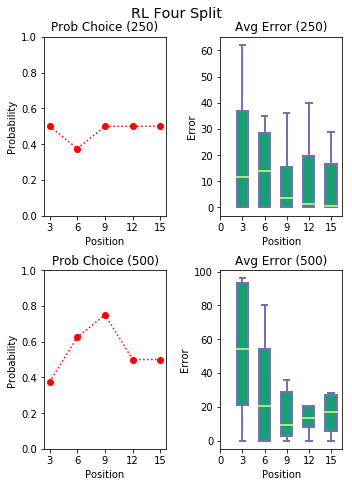

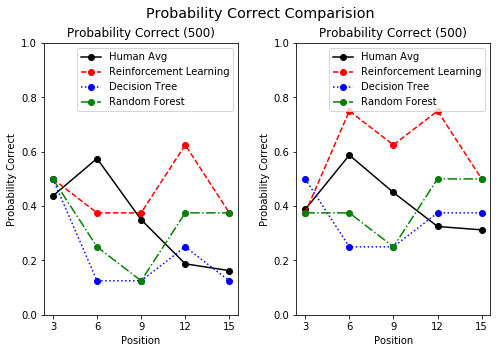

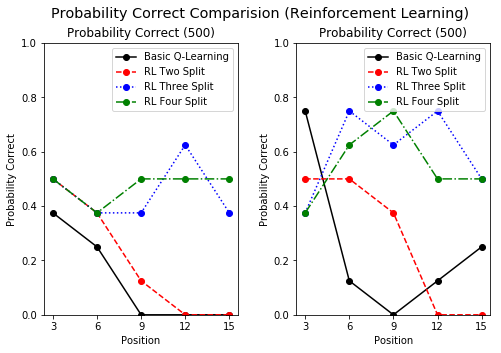

In [8]:
super_duper_selecting_plotter()
beautifully_plot_data()

In [9]:
def readfile(filename):
    results = []
    fileObject = open(filename,'rb')  
    results = pickle.load(fileObject)
    fileObject.close()
    return results


def get_all_filenames(directoryname):
    txtfiles = []
    for file in glob.glob(directoryname):
        txtfiles.append(file)
    return txtfiles


def min_loc():
    final_minimum = readfile('Tests/Human_minimum.pickle')
    result = []
    for i, res in enumerate(final_minimum):
        temp_result = []
        for j, traj_res in enumerate(res):
            temp_result.append(traj_res[1])
        result.append(temp_result)
    return result


def get_final_results(directory):
    filenames = get_all_filenames(directory)
    final_results = [np.zeros(60),np.zeros(60)]
    final_error = [np.zeros(60),np.zeros(60)]
    final_minimum = readfile('Tests/Human_minimum.pickle')
    for filename in filenames:
        results = readfile(filename)
        for i, res in enumerate(results):
            temp_results = np.zeros(60)
            temp_errors = np.zeros(60)
            for j, traj_res in enumerate(res):
                if final_minimum[i][j] == traj_res: temp_results[j] += 1
                temp_errors[j] += traj_res[0]-final_minimum[i][j][0]
            final_results[i] = np.add(final_results[i], temp_results)
            final_error[i] = np.add(final_error[i], temp_errors)
            
    return final_results, final_error, len(filenames)

In [15]:
def result_combine_RMSE(res, mloc, min_compile, num):
    combine = [np.zeros(15),np.zeros(15)]
    for i, item in enumerate(res):
        for j, idx in enumerate(item):
            if idx: combine[i][mloc[i][j]] += idx
    combine = [np.divide(combine[0],min_compile[0]*num),np.divide(combine[1],min_compile[1]*num)]
    return combine

def RMSE(directory):
    mloc = min_loc()
    min_compile = [np.zeros(15),np.zeros(15)]
    for i, item in enumerate(mloc):
        for idx in item:
            min_compile[i][idx] += 1
    test_res, test_err, test_num= get_final_results(directory)
    human_res, human_err, human_num = get_final_results('Tests/test*')
    test_compile = result_combine_RMSE(test_res, mloc, min_compile, test_num)
    human_compile = result_combine_RMSE(human_res, mloc, min_compile, human_num)
    
    RMSE_250 = np.sqrt((np.sum(np.power(np.subtract(human_compile[0],test_compile[0]),2)))/len(human_compile[0]))
    RMSE_500 = np.sqrt((np.sum(np.power(np.subtract(human_compile[1],test_compile[1]),2)))/len(human_compile[1]))
    
    return [RMSE_250, RMSE_500]

In [31]:
def result_combine_LL(res, mloc):
    combine = [np.zeros(15),np.zeros(15)]
    for i, item in enumerate(res):
        for j, idx in enumerate(item):
            if idx: combine[i][mloc[i][j]] += idx
    return combine

def create_consolidated_LL(test_compile, test_num, human_compile, human_num, min_compile):
    test_compile = [np.divide(test_compile[0],min_compile[0]*test_num),np.divide(test_compile[1],min_compile[1]*test_num)]
    consolidated = []
    for i, traj in enumerate(human_compile):
        temp = []
        for j, val in enumerate(traj):
            temp.append((human_compile[i][j], min_compile[i][j]*human_num, test_compile[i][j]))
        consolidated.append(temp)
    return consolidated

def computeLogLikelihood(S, N, p):
    p = p if p > 0.0 else 0.0+1e-10
    p = p if p < 1.0 else 1.0-1e-10
    if N == 0 :result = 0
    else: result = math.log(comb(N, S)) + (S*math.log(p) + (N-S)*math.log(1.0-p))

    return result

def log_likelihood(directory):
    mloc = min_loc()
    min_compile = [np.zeros(15),np.zeros(15)]
    for i, item in enumerate(mloc):
        for idx in item:
            min_compile[i][idx] += 1
    test_res, test_err, test_num= get_final_results(directory)
    human_res, human_err, human_num = get_final_results('Tests/test*')
    test_compile = result_combine_LL(test_res, mloc)
    human_compile = result_combine_LL(human_res, mloc)
    
    consolidated = create_consolidated_LL(test_compile, test_num, human_compile, human_num, min_compile)
    
    result_LL = []
    for i, traj in enumerate(consolidated):
        temp = []
        for j, val in enumerate(traj):
            temp.append(computeLogLikelihood(val[0], val[1], val[2]))
        result_LL.append(np.sum(temp)*-1)

    return result_LL

In [35]:
RL1_RMSE = RMSE('Tests/basic_RL')
print('Basic RL RMSE   \t\t', RL1_RMSE)

RL2_RMSE = RMSE('Tests/rl_two_split_10_5')
print('RL-2S-10/5 RMSE \t\t', RL2_RMSE)
RL3_RMSE = RMSE('Tests/rl_two_split_5_10')
print('RL-2S-5/10 RMSE \t\t', RL3_RMSE)
RL4_RMSE = RMSE('Tests/rl_two_split_8_7')
print('RL-2S-8/7  RMSE \t\t', RL4_RMSE)

RL5_RMSE = RMSE('Tests/rl_three_split_avg')
print('RL-3S-avg RMSE  \t\t', RL5_RMSE)
RL6_RMSE = RMSE('Tests/rl_three_split_opt_stop')
print('RL-3S-opt RMSE  \t\t', RL6_RMSE)

RL7_RMSE = RMSE('Tests/rl_four_split_avg')
print('RL-4S-avg RMSE  \t\t', RL7_RMSE)
RL8_RMSE = RMSE('Tests/rl_four_split_opt_stop')
print('RL-4S-opt RMSE  \t\t', RL8_RMSE)

print('\n\n')

DT_RMSE = RMSE('Tests/decision_tree')
print('Decision Tree RMSE \t\t', DT_RMSE)
RF_RMSE = RMSE('Tests/random_forest')
print('Random Forest RMSE \t\t', RF_RMSE)

Basic RL RMSE   		 [0.2882237267586877, 0.42577135883006506]
RL-2S-10/5 RMSE 		 [0.25930596470836015, 0.25906482457742763]
RL-2S-5/10 RMSE 		 [0.27866871012009936, 0.4684082087239719]
RL-2S-8/7  RMSE 		 [0.18805473493994596, 0.345552094480702]
RL-3S-avg RMSE  		 [0.25607209271349085, 0.3512329473915187]
RL-3S-opt RMSE  		 [0.24611565709370598, 0.32982002668121896]
RL-4S-avg RMSE  		 [0.37687033579203333, 0.3038468638420786]
RL-4S-opt RMSE  		 [0.2687742237145023, 0.31263330490101876]



Decision Tree RMSE 		 [0.2664387046458028, 0.41234845701178513]
Random Forest RMSE 		 [0.27603970125086474, 0.35857065784398295]


In [33]:
RL1_log_likelihood = log_likelihood('Tests/basic_RL')
print('Basic RL log_likelihood   \t\t', RL1_log_likelihood)

RL2_log_likelihood = log_likelihood('Tests/rl_two_split_10_5')
print('RL-2S-10/5 log_likelihood \t\t', RL2_log_likelihood)
RL3_log_likelihood = log_likelihood('Tests/rl_two_split_5_10')
print('RL-2S-5/10 log_likelihood \t\t', RL3_log_likelihood)
RL4_log_likelihood = log_likelihood('Tests/rl_two_split_8_7')
print('RL-2S-8/7  log_likelihood \t\t', RL4_log_likelihood)

RL5_log_likelihood = log_likelihood('Tests/rl_three_split_avg')
print('RL-3S-avg log_likelihood  \t\t', RL5_log_likelihood)
RL6_log_likelihood = log_likelihood('Tests/rl_three_split_opt_stop')
print('RL-3S-opt log_likelihood  \t\t', RL6_log_likelihood)

RL7_log_likelihood = log_likelihood('Tests/rl_four_split_avg')
print('RL-4S-avg log_likelihood  \t\t', RL7_log_likelihood)
RL8_log_likelihood = log_likelihood('Tests/rl_four_split_opt_stop')
print('RL-4S-opt log_likelihood  \t\t', RL8_log_likelihood)

print('\n\n')

DT_log_likelihood = log_likelihood('Tests/decision_tree')
print('Decision Tree log_likelihood \t\t', DT_log_likelihood)
RF_log_likelihood = log_likelihood('Tests/random_forest')
print('Random Forest log_likelihood \t\t', RF_log_likelihood)

Basic RL log_likelihood   		 [1963.3221444844162, 2395.8367289579924]
RL-2S-10/5 log_likelihood 		 [1426.5010472776974, 1590.6119328292825]
RL-2S-5/10 log_likelihood 		 [2882.9929914062204, 4702.552108375194]
RL-2S-8/7  log_likelihood 		 [1651.5062076278361, 2941.6458062884612]
RL-3S-avg log_likelihood  		 [308.1485059496524, 1029.65257566495]
RL-3S-opt log_likelihood  		 [382.2475356163417, 1006.643369389237]
RL-4S-avg log_likelihood  		 [1039.6826328817729, 746.7831074834464]
RL-4S-opt log_likelihood  		 [602.9669258216568, 759.1189056199382]



Decision Tree log_likelihood 		 [670.7879520821394, 1381.4119254244567]
Random Forest log_likelihood 		 [602.9602992227415, 1302.229060262196]
